<img src="banner2.jpg" style="width:100%">

# FINAL PROJECT | HOTEL REVIEW BADGE TEXT CLASSIFICATION 

<br></br>
    
**Submitted By:**
1. Aluyen, Jan Christian
2. Andam, Jhun Brian
3. Garcia, Gabriel Gary
4. Yramis, Neil Steven

<br>

**Submitted To:**
- Ms. Love Jhoye Raboy

# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings as fws
fws('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('Andam_Aluyen_Garcia_Yramis.csv').dropna()
df.head()

,Hotel Name,Badge,Review,Rating,Review_date,Detected_Language,Cleaned_Description
0,Marco Polo Plaza Cebu,Good,The property is wonderful. I would recommend. ...,6.0,"Sep 10, 2022",en,the property is wonderful i would recommend li...
1,Marco Polo Plaza Cebu,Exceptional,The staff is incredible,10.0,"Aug 31, 2022",en,the staff is incredible
2,Marco Polo Plaza Cebu,Exceptional,Very clean and friendly staff,10.0,"Aug 17, 2022",en,very clean and friendly staff
3,Marco Polo Plaza Cebu,Exceptional,"By being in a diffrent country, it felt like h...",10.0,"Aug 11, 2022",en,by being in a diffrent country it felt like ho...
4,Marco Polo Plaza Cebu,Good,No free breakfast,6.0,"Jul 22, 2022",en,no free breakfast


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4004 entries, 0 to 4004
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hotel Name           4004 non-null   object 
 1   Badge                4004 non-null   object 
 2   Review               4004 non-null   object 
 3   Rating               4004 non-null   float64
 4   Review_date          4004 non-null   object 
 5   Detected_Language    4004 non-null   object 
 6   Cleaned_Description  4004 non-null   object 
dtypes: float64(1), object(6)
memory usage: 250.2+ KB


# EDA | Text Data Visualization

In [5]:
import seaborn as sns

sns.set_theme(rc={'figure.figsize':(9,6)})

Text(0.5, 1.0, 'Classes')

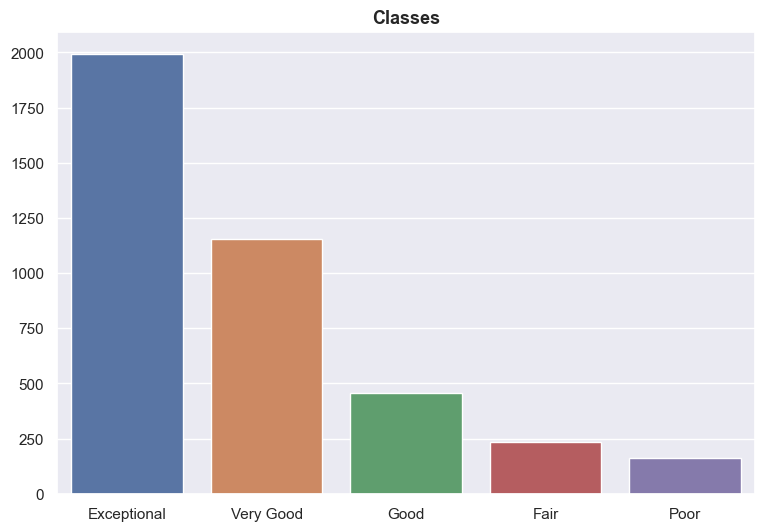

In [6]:
sns.barplot(x=df['Badge'].value_counts().index, y=df['Badge'].value_counts().values)
plt.title("Classes", fontweight="bold", fontsize="13")

In [7]:
from wordcloud import WordCloud
import re
import string
import nltk
import pandas as pd
import json

import contractions
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.corpus import words

class Normalizer:
    
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stemmer = PorterStemmer()
        self.stop_words = stopwords.words('english')
        self.english_words = set(words.words())

    def lowercase(self, data):
        return data.lower()
    
    def remove_punctuations_and_emojis(self, data):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)

        data = data.translate(str.maketrans('', '', string.punctuation))
        data = re.sub(emoji_pattern, '', data)
        return data
    
    def expand_sentence(self, data):
        contraction_map = {k.lower():v.lower() for k,v in contractions.contractions_dict.items()}

        words = data.split()
        expanded_words = []
        for word in words:
            if word in contraction_map:
                expanded_words.append(contraction_map[word])
            else:
                expanded_words.append(word)
        return " ".join(expanded_words)
    
    def remove_stop_words(self, data):
        return " ".join([word for word in data.split() if word not in self.stop_words])
    
    def remove_non_english_words(self, data):
        return " ".join([word for word in data.split() if word in self.english_words])
    
    def lemmatize(self, data):
        return " ".join([self.lemmatizer.lemmatize(word) for word in data.split()])
    
    def stem(self, data):
        return " ".join([self.stemmer.stem(word) for word in data.split()])

    def normalize(self, 
                  data, 
                  lowercase=True, 
                  remove_punctuations_and_emojis=True,
                  expand_sentence=True,
                  remove_stop_words=True,
                  remove_non_english_words=True,
                  lemmatize=True,
                  stem=True):
        if lowercase:
            data = data.apply(self.lowercase)
        if remove_punctuations_and_emojis:
            data = data.apply(self.remove_punctuations_and_emojis)
        if expand_sentence:
            data = data.apply(self.expand_sentence)
        if remove_stop_words:
            data = data.apply(self.remove_stop_words)
        if remove_non_english_words:
            data = data.apply(self.remove_non_english_words)
        if lemmatize:
            data = data.apply(self.lemmatize)
        if stem:
            data = data.apply(self.stem)
        return data

en_df = df[df['Detected_Language'] == 'en'].reset_index(drop=True) 
N = Normalizer()
eda_txt = N.normalize(en_df['Review'], stem=False)
eda_df = pd.concat([en_df['Badge'], eda_txt], axis=1)

In [8]:
class_dict = {}
for i in eda_df['Badge'].unique():
    txt = eda_df[eda_df['Badge'] == i]['Review'].values
    class_dict[i] = list(txt)
    
class_dict = {k:' '.join(class_dict[k]) for k,v in class_dict.items()}

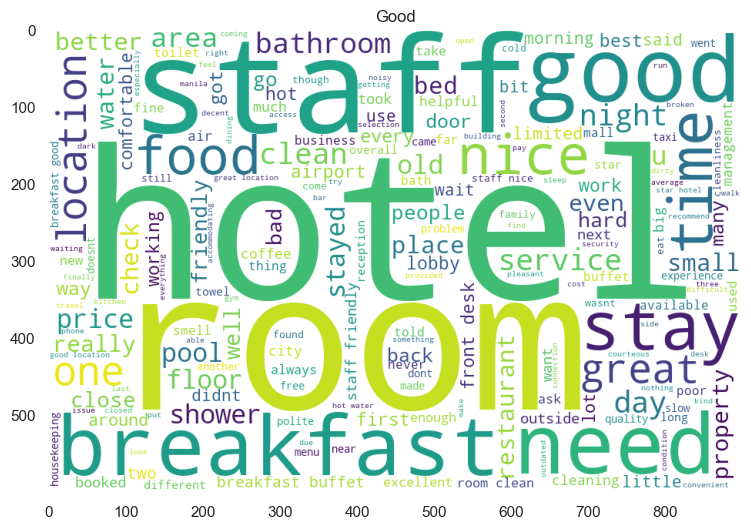

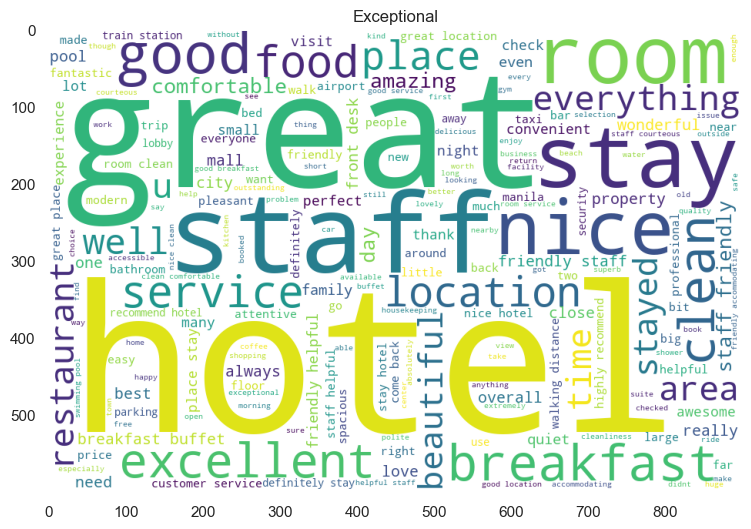

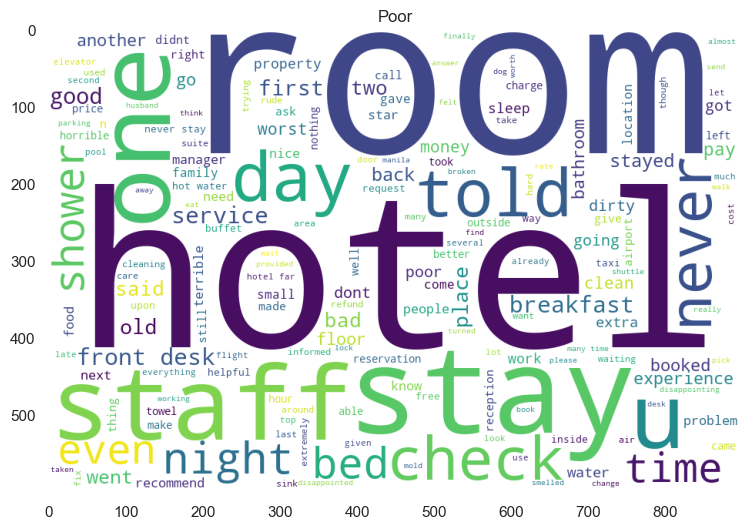

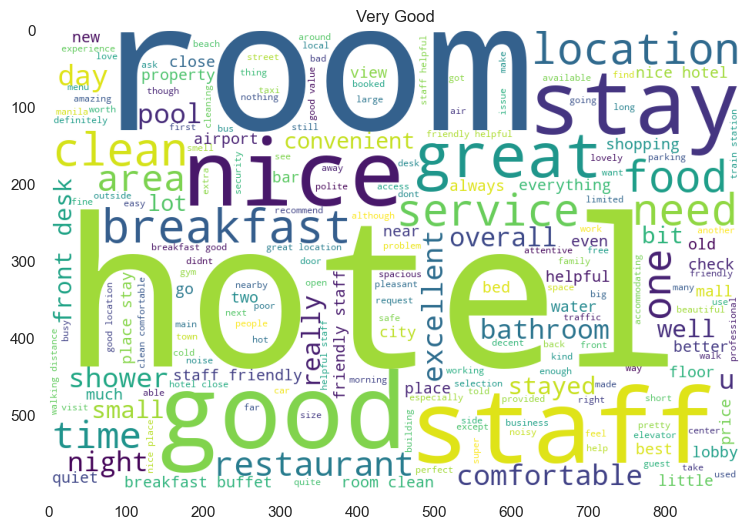

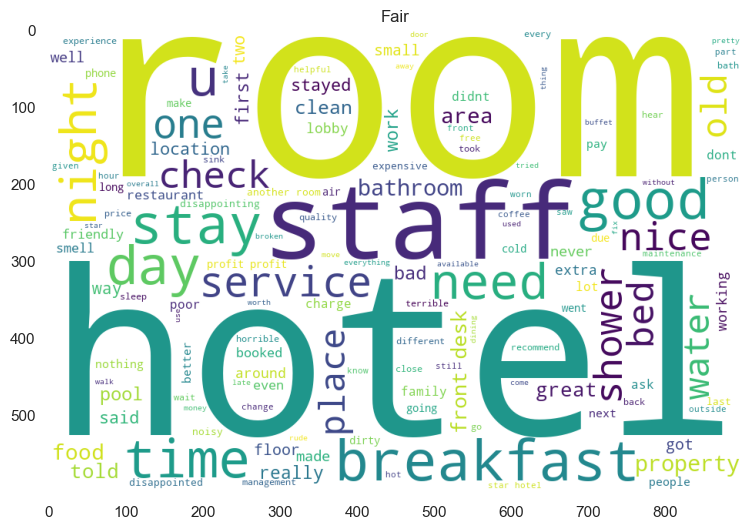

In [13]:
%matplotlib inline

wordcloud = WordCloud(width = 900, height = 600,
                background_color ='white',
                min_font_size = 10)

for k,v in class_dict.items():
    plt.imshow(wordcloud.generate(v))
    plt.title(k)
    plt.grid(visible=False)
    plt.show()

In [14]:
top_200 = {}
for k,v in class_dict.items():
    top = wordcloud.generate(class_dict[k])
    top_200[k] = list(top.words_.keys())

In [15]:
# will be used in columns
top_200_words = set()
for idx in top_200.values():
    for word in idx:
        if len(word.split()) > 1:
            for i in word.split():
                top_200_words.add(i)
        else:
            top_200_words.add(word)

## Normalization

In [16]:
en_df = df[df['Detected_Language'] == 'en'].reset_index(drop=True)

normalized_data = N.normalize(data=en_df['Cleaned_Description'])
top_words = N.normalize(pd.Series(list(top_200_words)))

## BoW and TF-IDF Transformation

In [18]:
# In this part of code, we transformed the normalized text data into the Bag of Words
# and TF-IDF matrices in a form of pandas.DataFrame. To do this, we defined a class named
# Encoder that has two main methods called bow() and tf_idf. Upon isntantiating this class,
# It requires the normalized text data as a pandas.Series object as the parameter.
# After instantiating the class with a variable together with the required argument, we then
# called the methods inside to create a BoW matrix and TF-IDF matrix from the normalized text data.

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
class Encoder:
    
    def __init__(self, data):
        self.data = data
    
    def bow(self, n_gram=(1,1)):
        vectorizer = CountVectorizer(min_df=1, ngram_range=n_gram)
        bow = vectorizer.fit_transform(self.data)
        return pd.DataFrame(bow.toarray(), columns=vectorizer.get_feature_names_out())
    
    def tf_idf(self):
        vectorizer = TfidfVectorizer(norm='l2', smooth_idf=True, use_idf=True)
        tfidf = vectorizer.fit_transform(self.data)
        return pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names_out())

E = Encoder(normalized_data)
bow_df = E.bow()
tf_idf_df = E.tf_idf()

In [19]:
# Since there are about 8000 + words from the original BoW matrix, we decided to reduce the 
# unique words by applying the top 200 most frequent words per badge, we then end up with
# only 361 words in total. This method actually improved the accuracy.

bow_df = bow_df[[i for i in top_words if i in bow_df.columns]]
tf_idf_df = tf_idf_df[[i for i in top_words if i in tf_idf_df.columns]]


display(bow_df.head())
display(tf_idf_df.head())

,manila,thank,sick,clean,gave,found,anyth,delici,saw,put,...,eat,conveni,wonder,end,big,profit,huge,provid,decid,properti
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,manila,thank,sick,clean,gave,found,anyth,delici,saw,put,...,eat,conveni,wonder,end,big,profit,huge,provid,decid,properti
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.219313,0.0,0.0,0.0,0.0,0.0,0.0,0.196842
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.616649,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


# Model Training

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix, classification_report

def cat_2_num(series):
    le = LabelEncoder()
    return le.fit_transform(series)

cat = cat_2_num(en_df['Badge'])

In [21]:
# libraries, includes all ML algorithms that will be used for the train data simulation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# function that trains the model by the train data and returns the performance of the
# model in a form of classification report
def train_model(algorithm, X, y, random_state=101, test_size=0.25):
    
    # Partition dataset 75% train, 25% test
    X_train, X_test, y_train, y_test = tts(X,y, random_state=random_state, test_size=test_size)
    
    # model variable will be the algorithm with the fitted train data
    model = algorithm.fit(X_train, y_train)
    
    # after fitting, the model is expected to learn, to assess its learning
    # performance we let it predict the unseen data which is the test data
    y_pred = model.predict(X_test)
    
    # and then we compare the performance based on the true values and the predicted values
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    # printing the classification report, includes some important performance metrics
    print(f"Train Accuracy: {train_score}")
    print(f"Test Accuracy: {test_score}")
    print('-'*55)
    print(classification_report(y_test, y_pred))
    print('_'*55, '\n')
    return model, np.round(train_score, 2), np.round(test_score, 2)

In [22]:
# models is a dictionary with the name of the algorithm as keys
# and the algorithm's object with the parameters as values
models = {"KNN": KNeighborsClassifier(n_neighbors=1),
          "Logistic Regression": LogisticRegression(max_iter=10_000),
          "Linear SVC": LinearSVC(),
          "SVC Classifier": SVC(),
          "Decision Tree": DecisionTreeClassifier(max_depth=100),
          "Random Forest": RandomForestClassifier(max_depth=100),
          "XGBoost": XGBClassifier()}

# we then created another empty dictionary which will store the results
# using the BoW as the independent or X variable
bow_model_results = {k:[] for k in models.keys()}

# removed nuisance words
bow_X = bow_df.loc[:, ~bow_df.columns.duplicated()]

# loop over the models dictionary items and train the train data per iteration
for key, clf in models.items():
    print(key.upper())
    
    # these variables will be appended to the bow_model_results dictionary
    clf, train_acc, test_acc = train_model(clf, X=bow_X, y=cat)
    bow_model_results[key].append(clf)
    bow_model_results[key].append(train_acc)
    bow_model_results[key].append(test_acc)

KNN
Train Accuracy: 0.9887429643527205
Test Accuracy: 0.4015748031496063
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.58      0.58       443
           1       0.06      0.11      0.08        46
           2       0.18      0.18      0.18       105
           3       0.45      0.10      0.17        49
           4       0.27      0.29      0.28       246

    accuracy                           0.40       889
   macro avg       0.31      0.25      0.26       889
weighted avg       0.42      0.40      0.40       889

_______________________________________________________ 

LOGISTIC REGRESSION
Train Accuracy: 0.7166979362101313
Test Accuracy: 0.547806524184477
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.80      0.72       443
           1       0.24      0.24      0.24        46
           2     

In [23]:
# show the performance of the model when fitted to BoW
framer = lambda dict_: pd.DataFrame({k:v[1:] for k,v in dict_.items()}).T

bow_results = framer(bow_model_results).rename_axis('BoW')
bow_results.columns = ['Train_Acc', 'Test_Acc']
bow_results

,Train_Acc,Test_Acc
BoW,,
KNN,0.99,0.40
Logistic Regression,0.72,0.55
Linear SVC,0.72,0.54
SVC Classifier,0.75,0.52
Decision Tree,0.98,0.44
Random Forest,0.99,0.54
XGBoost,0.87,0.56


In [24]:
# The procedures above was just repeated here, but this time
# we used tf-idf matrix as the indepenent variable
tfidf_model_results = {k:[] for k in models.keys()}

tf_idf_X = tf_idf_df.loc[:, ~tf_idf_df.columns.duplicated()]
for key, clf in models.items():
    print(key.upper())
    clf, train_acc, test_acc = train_model(clf, X=tf_idf_X, y=cat)
    tfidf_model_results[key].append(clf)
    tfidf_model_results[key].append(train_acc)
    tfidf_model_results[key].append(test_acc)

KNN
Train Accuracy: 0.9928705440900563
Test Accuracy: 0.41169853768278963
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.58      0.61       443
           1       0.09      0.20      0.13        46
           2       0.16      0.29      0.21       105
           3       0.36      0.08      0.13        49
           4       0.34      0.27      0.30       246

    accuracy                           0.41       889
   macro avg       0.32      0.28      0.27       889
weighted avg       0.46      0.41      0.42       889

_______________________________________________________ 

LOGISTIC REGRESSION
Train Accuracy: 0.625515947467167
Test Accuracy: 0.547806524184477
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.87      0.72       443
           1       0.00      0.00      0.00        46
           2     

In [25]:
# tf-idf results
tfidf_results = framer(tfidf_model_results).rename_axis('TF-IDF')
tfidf_results.columns = ['Train_Acc', 'Test_Acc']
tfidf_results

,Train_Acc,Test_Acc
TF-IDF,,
KNN,0.99,0.41
Logistic Regression,0.63,0.55
Linear SVC,0.69,0.56
SVC Classifier,0.82,0.55
Decision Tree,0.99,0.43
Random Forest,0.99,0.54
XGBoost,0.94,0.55


## Evaluation

In [26]:
# XGBoost gained the best accuracy with BoW matrix as the independent variable
bow_X = bow_df.loc[:, ~bow_df.columns.duplicated()]

X_train, X_test, y_train, y_test = tts(bow_X, cat, random_state=101, test_size=0.25)
final_model = XGBClassifier().fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.84      0.73       443
           1       0.38      0.22      0.28        46
           2       0.38      0.23      0.28       105
           3       0.53      0.20      0.29        49
           4       0.41      0.34      0.37       246

    accuracy                           0.56       889
   macro avg       0.47      0.37      0.39       889
weighted avg       0.53      0.56      0.53       889



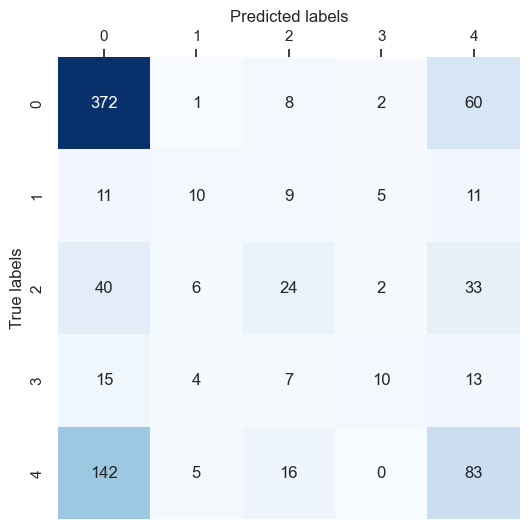

In [27]:
# confusion matrix of XGBoost model
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d', cbar=False, square=True, cmap='Blues')

ax.set_title('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticks_position('top')

# Results and Conclusions

In [28]:
display(bow_results)
display(tfidf_results)

,Train_Acc,Test_Acc
BoW,,
KNN,0.99,0.40
Logistic Regression,0.72,0.55
Linear SVC,0.72,0.54
SVC Classifier,0.75,0.52
Decision Tree,0.98,0.44
Random Forest,0.99,0.54
XGBoost,0.87,0.56


,Train_Acc,Test_Acc
TF-IDF,,
KNN,0.99,0.41
Logistic Regression,0.63,0.55
Linear SVC,0.69,0.56
SVC Classifier,0.82,0.55
Decision Tree,0.99,0.43
Random Forest,0.99,0.54
XGBoost,0.94,0.55


In [29]:
def PCC(target, plot=True, title=None):
    """
    Calculates the Proportion Chance Criteria and returns a plot if plot sets to True.
    Parameters
    ----------
    target: pd.Series or np.array of categorical data.
    plot: default, True
    title: str,
    """
    
    from collections import Counter
    state_counts = Counter(target)
    df_state = pd.DataFrame.from_dict(state_counts, orient='index')
    num=(df_state[0]/df_state[0].sum())**2
    ret = 1.25*100*num.sum()
    
    if plot == True:
        plt.figure(figsize=(9,6))
        ax = sns.countplot(x=target)
        ax.bar_label(ax.containers[0])
        if title:
            plt.title(f"{title}\n(1.25 PCC = {np.round(ret,3)}%)", fontsize=15, fontweight='bold')
        plt.show()

**BaselineScore: Score to beat.**

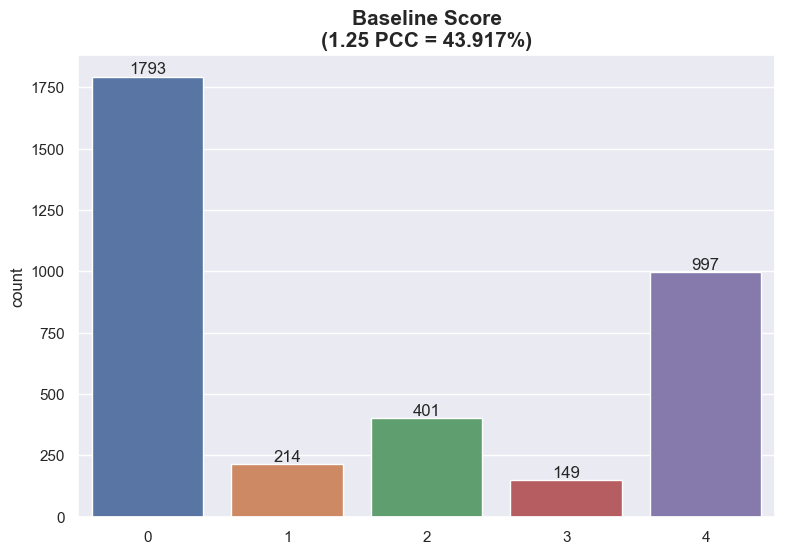

In [30]:
PCC(cat, title='Baseline Score')

* **Loading Data**
    - Loading `csv` file
    <br><br>
* **Text Data Visualization**
    - Classes (Countplot visualization)
    - Top 200 most frequent words per `Badge` (Wordcloud visualization)
    <br><br>
* **Normalization**
    - Refer to `Transform.py` module `Normalizer` class
        - `lowercase()`
        - `remove_punctuations_and_emojis()`
        - `expand_sentence()`
        - `remove_stop_words()`
        - `remove_non_english_words()`
        - `lemmatize()`
        - `stem()`
        - `normalize()`
        <br><br>
* **BoW and TF-IDF Transformation**
    - Refer to `Transform.py` module `Encoder` class
        - bow()
        - tf_idf()
        - Reducing columns by only applying the top 200 most frequent words to the `bow()` and `tf_idf()` instances.
        <br><br>
* **Model Training**
    - Selected classification model simulation
        - KNeighborsClassifier
        - LogisticRegression
        - LinearSVC
        - SVC
        - DecisionTreeClassifier
        - RandomForestClassifier
        - XGBClassifier
    - Evaluation
        - Performance metrics
            - accuracy
            - precision    
            - recall  
            - f1-score
            - confusion matrix
            <br><br>
* **Results and Conclusions**
    - Simulation Results (Best Model)
    - Baseline score